<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Bad-or-Good-Customer-to-give-a-Loan-to-/blob/main/Data_Science_Good_or_Bad_Customer_to_give_a_loan_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project : Prediction if a Customer is Good or Bad to give a loan to**.

Based on same basic bank raw data, we will be analyzing the dataset by going through all the crucial steps of a Data Science Project, from preparing the Data to Building the Machine Learning Model, in order to validate it to have it as a reference for a bank or any financial institution that preoccupy to give loans to its customers.

And in this project we will try to build ultimately a Logistic Regression Model and understand the hyper parameters that can allow us to optimize our choices for a an optimal model.

### **Importing & Installing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


%matplotlib inline

# Increase the size of seaborn plots
sns.set(rc = {'figure.figsize': (8, 8)})

# !conda list check the packages installed

#### **Step 1 : Getting the Data**

In [2]:
# Loading the data to google colab
from google.colab import files
uploaded = files.upload()

Saving Raw_Data.csv to Raw_Data.csv


In [3]:
raw_data = pd.read_csv("Raw_Data.csv")

# Displaying the First Rows of the Data
display(raw_data.head(10), "The Shape of the DataSet is {}".format(raw_data.shape))

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No
5,No Data,critical,Learning / Edu purposes,6130.0,0-200,2-5 Years,Male,No,No Security,30.0,Free,Skilled Labor,No,No
6,No Data,critical,Buying a New Car,1394.0,0-200,0-2 Years,Female,No,Vehicle,37.0,House Owner,Professional / Management,No,No
7,No Data,critical,Buying a New Car,7242.0,0-200,2-5 Years,Male,No,Savings Account,41.0,House Owner,Services,No,No
8,No Data,critical,TV,9581.0,0-200,2-5 Years,Female,No,Vehicle,31.0,House Owner,Skilled Labor,No,No
9,No Data,critical,TV,734.0,No Data,7+ Years,Male,No,Savings Account,44.0,Renting,Services,No,No


'The Shape of the DataSet is (1006, 14)'

In [4]:
# Copying the Data in order to proceed to benchmarking when we finish analyzing the Data 
df = raw_data.copy()

#### **Step 2 : Data Preprocessing**

In [5]:
# Exploring the Data
display("The Features of the DataSet are ", df.columns)

'The Features of the DataSet are '

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

In [6]:
# Exploring the DataTypes of our Features
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Stauts         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

So apparently, we have only two features with purely numeric data the *Loan Amount* & *Age* columns. And for the rest of the Data, the type that we have is the *Object*. 
At all events, we will convert our data to dummy one in order to build the Model.

In [7]:
# Displaying the Unique Values of each columns
for column in df:
  if len(df[column].unique()) < 10:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df[column].unique())))


The Number of Values for the Feature Type of Account : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature Account History : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature Reason for the Loan : 11
The Number of values for the Feature Loan Amount : 914
The Number of Values for the Feature Account Savings : ['0-200' 'No Data' '200-500' '1000+' '500-1000' nan '0-201'] ---- 7
The Number of Values for the Feature Employment History : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature Individual Stauts : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature Other Loans : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature Security / Collateral : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature Age : 58
The Number of Values for the Featu

In [10]:
# Describing the Data 
df.describe()

,Loan Amount,Age
count,1.003000e+03,1002.000000
mean,-5.436215e+05,35.841317
std,1.732054e+07,14.657180
min,-5.485413e+08,18.000000
25%,1.374500e+03,27.000000
50%,2.326000e+03,33.000000
75%,3.981500e+03,42.000000
max,1.842700e+04,327.000000


In [16]:
# Displaying the Kurtosis and the Skewness of the Data
display("The Kurtosis of the DataSet is {}".format(df.kurtosis()))

display("The Skewness of the DataSet is {}".format(df.skew()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


'The Kurtosis of the DataSet is Loan Amount    1002.999947\nAge             154.752052\ndtype: float64'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


'The Skewness of the DataSet is Loan Amount   -31.670174\nAge             8.278180\ndtype: float64'

After descring the Data, we observe some for example some aberrant data in both the Loan Amount and the Age features.
For instance, the minimum Loan amount as stated above is **-5.485413e+08**, which is cannot be possible for a loan to be negative, so we need to drop some data later on.
At the same time, by looking at the Age column, wa can figure out that some data is also false, like the the max Age that is 327 years old, effectively a human being cannot surpass 150 years, except LEGENDS THAT CAN LIVE FOREVER, JUST KIDDING, let's get back to work.

In [18]:
df.info

<bound method DataFrame.info of      Type of Account         Account History  ... Completed Other loan?  Good Loan
0            No Data                critical  ...                    No         No
1            No Data                critical  ...                    No         No
2            No Data                critical  ...                    No         No
3            No Data                critical  ...                   Yes         No
4            No Data                critical  ...                    No         No
...              ...                     ...  ...                   ...        ...
1001          Type C  Average (known delays)  ...                    No        Yes
1002          Type C  Average (known delays)  ...                    No         No
1003          Type C  Average (known delays)  ...                    No        Yes
1004             NaN                     NaN  ...                    No        NaN
1005             NaN                     NaN  ...      

In [19]:
### Data Pre-processing
## Determining the Unique Values in the Dataset

for column in df:
  if len(df[column].unique()) < 7:
    print('The Number of Values for the Feature "{}" : {} ---- {}'.format(column, df[column].unique(), len(df[column].unique())))
  else:
    print('The Number of values for the Feature "{}" : {}'.format(column, len(df[column].unique())))



The Number of Values for the Feature "Type of Account" : ['No Data' 'Type A' 'Type B' 'Type C' nan] ---- 5
The Number of Values for the Feature "Account History" : ['critical' 'Average (known delays)' 'Good' nan] ---- 4
The Number of values for the Feature "Reason for the Loan" : 11
The Number of values for the Feature "Loan Amount" : 914
The Number of values for the Feature "Account Savings" : 7
The Number of Values for the Feature "Employment History" : ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed' nan] ---- 6
The Number of Values for the Feature "Individual Stauts" : ['Male' 'Married' 'Female' 'Divorced' 'Female_' nan] ---- 6
The Number of Values for the Feature "Other Loans" : ['No' 'Yes' nan] ---- 3
The Number of Values for the Feature "Security / Collateral" : ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security' nan] ---- 5
The Number of values for the Feature "Age" : 58
The Number of Values for the Feature "Residence Status" : ['House Owner' 'Rentin

In [20]:
# Rename the column "Individual Stauts", cause there's a miss spelling
df.rename(columns = {"Individual Stauts": 'Individual Status'}, inplace = True)

**Reminder** : Among the steps in the EDA process, we have the **Outliers Indentification**, but in our case, we don't have relevant numeric Data, so we will pass by this step.

##### Dropping Duplicate Rows

In [21]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df.shape))

### The Code to remove the duplicate rows
duplicate_rows_df = df[df.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df.shape))

The Shape of the Data Before removing duplicate rows is (1006, 14)


'The Shape of the Duplicate Rows DataFrame is (0, 14)'

**Comment** : The Number of Rows of the Duplicated DataFrame is ZERO, so we don't have any duplicant rows.

##### Checking for any missing Data

In [22]:
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Status        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

**Comment** : apparently, every feature of the DataSet, have some missing Data to be looking at to decide what if it would be reasonable to keep them, or just drop them from the DataSet.

#### **Step 3 : Data Vizualisation**

Visualizing misisng values graphicaly

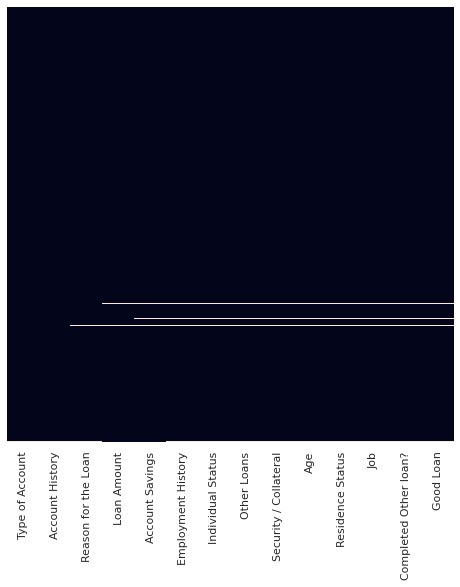

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)

By looking at the heatmap, we perceive that we effectively have some missing data, that we can visualize

To visualize the exact missing lines, we need to do a filter on one of the columns with the missing values.

For example, we will choose **Individual Status** feature.

In [24]:
# Viz the Missing Rows based on the Individual Status
df[df['Individual Status'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Printing the shape of the DataFrame before removing any missing value
print("The Num of Rows of the Original DataFrame",df.shape[0])

# Removing the Missing values
df = df.dropna(subset = ['Individual Status'])

The Num of Rows of the Original DataFrame 1006


In [ ]:
df.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Status        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

So we have cleaned our data, and we don't have missing values anymore.

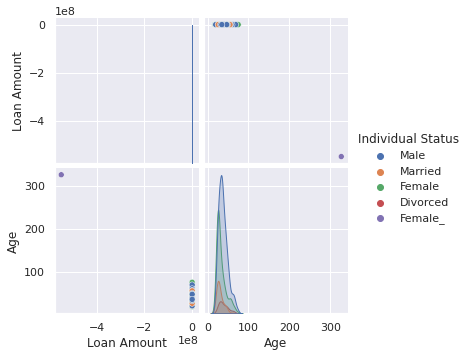

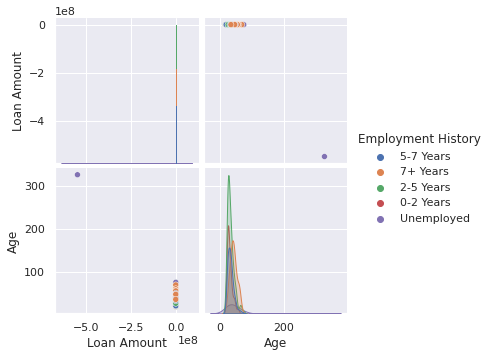

In [25]:
sns.pairplot(df, hue = 'Individual Status')
sns.pairplot(df, hue = 'Employment History')

**Comment** : By looking at either of the pairplots above, we can find that we have outliers like we've mentionned before of an age beyond 300 years, and a negative loan amount.

#### **Step 4 : Data Cleansing**

Deleting the Outliers

In [26]:
# Wa can eliminate the outliers, by applying some filters
df = df[df['Age'] < 100] 

# Eliminate the negative Loan Amounts
df = df[df["Loan Amount"] > 0]

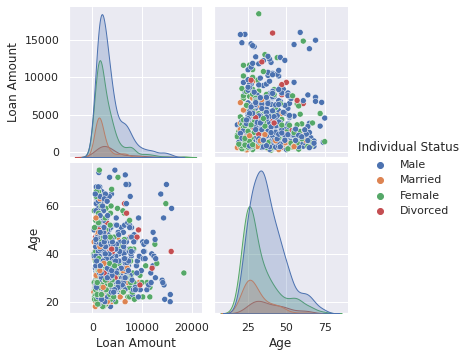

In [27]:
# Rerunning the pairplots
sns.pairplot(df, hue  = 'Individual Status')

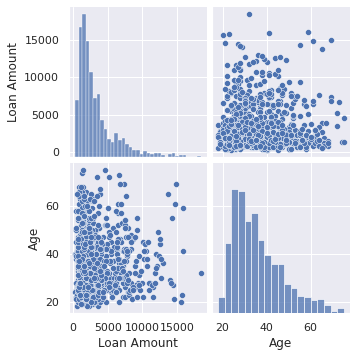

In [28]:
sns.pairplot(df)

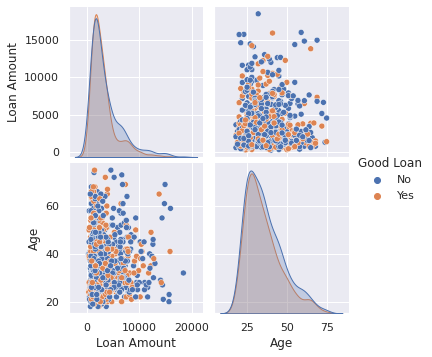

In [29]:
sns.pairplot(df, hue = 'Good Loan')

Investigating the distribution of y

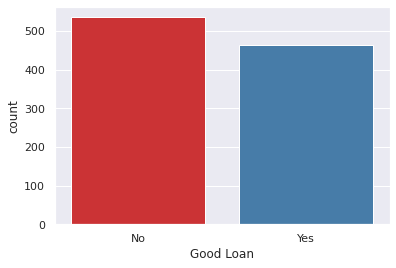

In [30]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1")

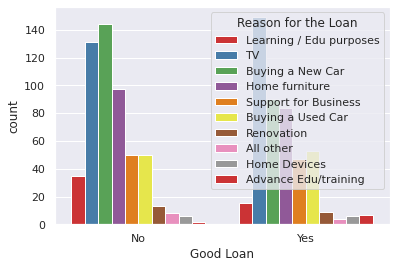

In [31]:
sns.countplot(x = 'Good Loan', data = df, palette = "Set1", hue = 'Reason for the Loan')

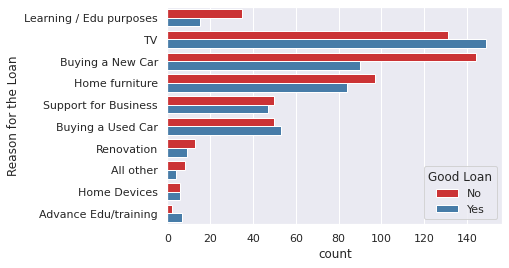

In [32]:
sns.countplot(y = 'Reason for the Loan', data = df, palette = "Set1", hue = "Good Loan")

if we look closely at the graph, we observe that for every *Reason to Buy a Loan* the answer NO is more than the answer YES, so based on this dataset the bank normaly take caution before approving a loan.
However for the *Advance Edu/training* we notice that the answer YES is way more than the answer NO, and the same goes for *Buying a Used Car*.
So from now on we need to enthral on attention on this.

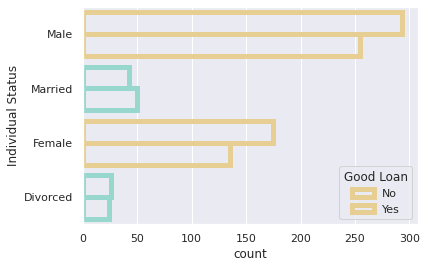

In [33]:
sns.countplot(y ='Individual Status', data = df,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2), hue = "Good Loan")

In [ ]:
# sns.set(rc={'figure.figsize':(18,18)})
# sns.violinplot(y = "Age", x = 'Loan Amount', data = df, hue = "Good Loan")

In [34]:
df.dtypes

Type of Account           object
Account History           object
Reason for the Loan       object
Loan Amount              float64
Account Savings           object
Employment History        object
Individual Status         object
Other Loans               object
Security / Collateral     object
Age                      float64
Residence Status          object
Job                       object
Completed Other loan?     object
Good Loan                 object
dtype: object

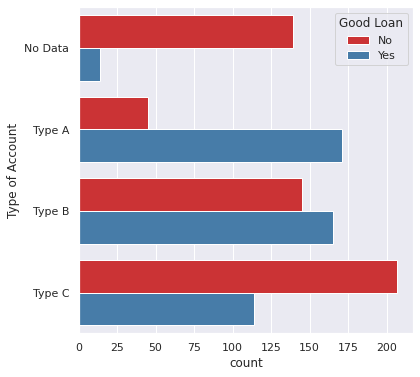

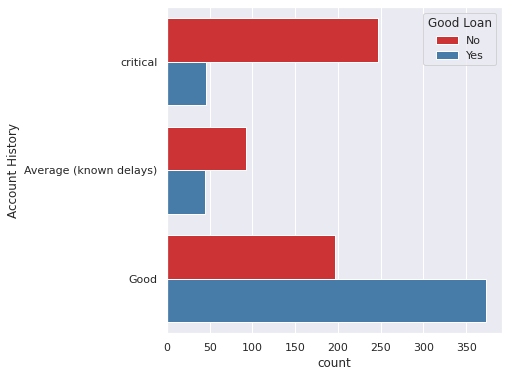

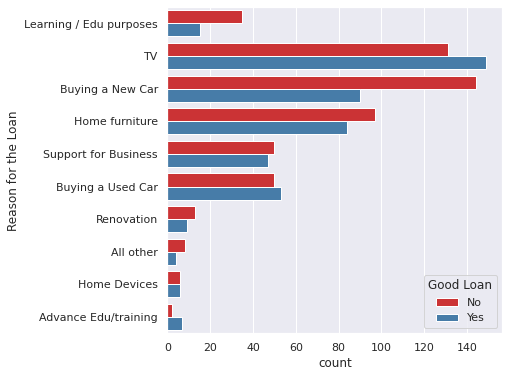

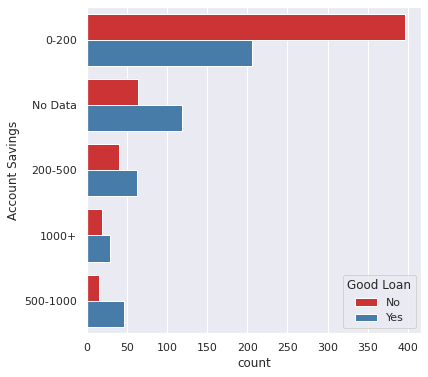

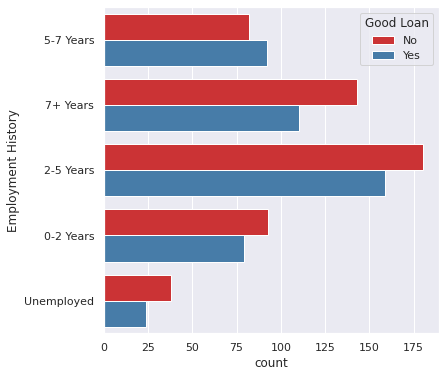

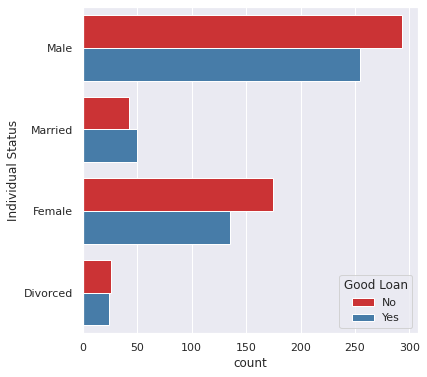

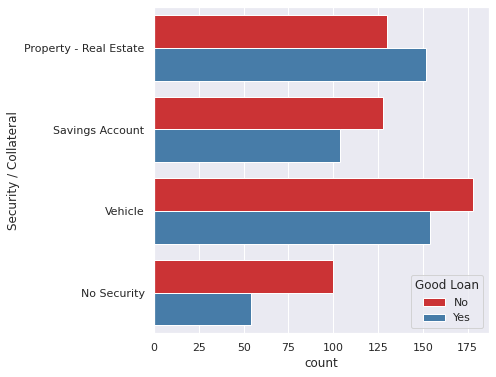

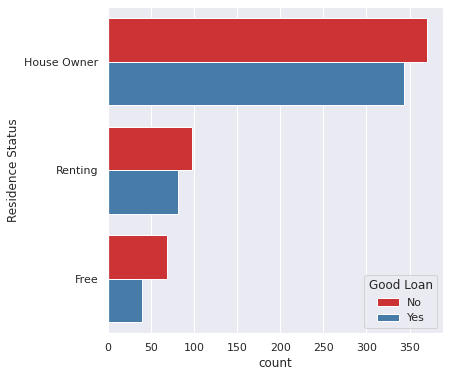

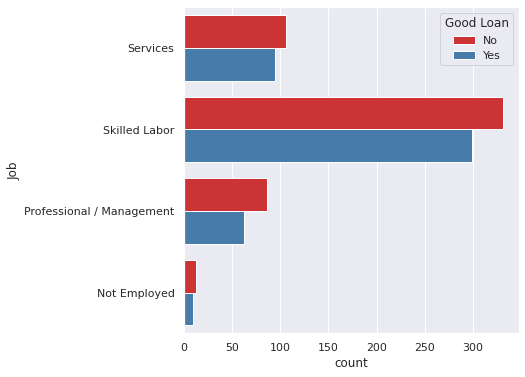

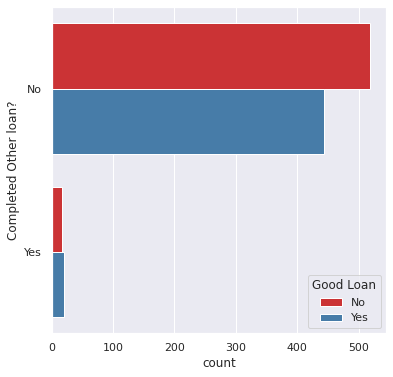

In [35]:
# Applying the countplot for every non numeric feature
features = [
       'Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Status', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?'
]

for feature in features:
  sns.set(rc = {'figure.figsize': (6, 6)})
  sns.countplot(y = feature, data = df, hue = "Good Loan", palette = "Set1")
  plt.show()

Encoding the Data from categorical to numeric data

In [37]:
# Encoding the Data 
# df = pd.get_dummies(df, columns = features)

# changing the Good Loan Values from Y/N to 1s & 0s
df['Good Loan'][df['Good Loan'] == "Yes"] = 1
df['Good Loan'][df['Good Loan'] == "No"] = 0

df['Other Loans'][df['Other Loans'] == "Yes"] = 1
df['Other Loans'][df['Other Loans'] == "No"] = 0

# Displaying the Data
df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is try

,Loan Amount,Other Loans,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Male,Individual Status_Married,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,0,47.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,2438.0,0,52.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2144.0,0,48.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,2073.0,0,25.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1
4,1276.0,0,59.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,0,47.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1000,4473.0,0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1001,12759.0,0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1002,2551.0,0,47.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [44]:
# Checking to see the number of rows that corresponds to "Other Laons" values

display(df[df["Other Loans"] == 0].value_counts)

print("~"*100)

display(df[df["Other Loans"] == 1].value_counts)

<bound method DataFrame.value_counts of       Loan Amount  ... Completed Other loan?_Yes
0          2116.0  ...                         0
1          2438.0  ...                         0
2          2144.0  ...                         0
3          2073.0  ...                         1
4          1276.0  ...                         0
...           ...  ...                       ...
999        3602.0  ...                         0
1000       4473.0  ...                         0
1001      12759.0  ...                         0
1002       2551.0  ...                         0
1003       1587.0  ...                         0

[907 rows x 48 columns]>

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<bound method DataFrame.value_counts of      Loan Amount  ... Completed Other loan?_Yes
10        1421.0  ...                         0
54        2351.0  ...                         0
87        5968.0  ...                         0
88        2790.0  ...                         0
94        1867.0  ...                         0
..           ...  ...                       ...
944       1894.0  ...                         0
948       1194.0  ...                         0
949       7302.0  ...                         0
957        791.0  ...                         0
997       7827.0  ...                         0

[93 rows x 48 columns]>

In [38]:
df[df['Good Loan'] == 1]

,Loan Amount,Other Loans,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Status_Divorced,Individual Status_Female,Individual Status_Male,Individual Status_Married,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
15,3579.0,0,45.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
17,1259.0,0,38.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
19,699.0,0,50.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
20,1595.0,0,46.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
21,1917.0,0,34.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,7686.0,0,42.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
997,7827.0,1,41.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
998,8950.0,0,32.0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1001,12759.0,0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [45]:
df['Good Loan'][df['Good Loan'] == 1]

15      1
17      1
19      1
20      1
21      1
       ..
996     1
997     1
998     1
1001    1
1003    1
Name: Good Loan, Length: 464, dtype: object

#### **Step 4 : Features Selection** 

Step of Running feature selection:
- Split the Data into X & y.
- Run a Tree-based estimator (i.g Decision Tree, Random Forest).
- Run feature importance.

In [46]:
# Split the data into X & y

colummns_to_drop = ['Good Loan', 'Age', 'Loan Amount', "Other Loans"]

X = df.drop(colummns_to_drop, axis = 1).values
y = df['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 44)
(1000,)


Running Decision Tree Classifier 

In [47]:
# Creating the Based Tree Model (In our case we choose the Decision Tree Model)
decision_tree = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)

In [48]:
decision_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [50]:
fi_col = []
fi = []

# Looking for features importance
for i, column in enumerate(df.drop(colummns_to_drop, axis = 1)):
  print("The Feature Imortance of the '{}' ---:--- {}".format(column, decision_tree.feature_importances_[i]))

  fi_col.append(column)
  fi.append(decision_tree.feature_importances_[i])

The Feature Imortance of the 'Type of Account_No Data' ---:--- 0.05575424226747407
The Feature Imortance of the 'Type of Account_Type A' ---:--- 0.057752422842833856
The Feature Imortance of the 'Type of Account_Type B' ---:--- 0.0028666449108544515
The Feature Imortance of the 'Type of Account_Type C' ---:--- 0.01903926385386251
The Feature Imortance of the 'Account History_Average (known delays)' ---:--- 0.002695312207388197
The Feature Imortance of the 'Account History_Good' ---:--- 0.19667072582184286
The Feature Imortance of the 'Account History_critical' ---:--- 0.0
The Feature Imortance of the 'Reason for the Loan_Advance Edu/training' ---:--- 0.0
The Feature Imortance of the 'Reason for the Loan_All other' ---:--- 0.003708833866517835
The Feature Imortance of the 'Reason for the Loan_Buying a New Car' ---:--- 0.02515766654444707
The Feature Imortance of the 'Reason for the Loan_Buying a Used Car' ---:--- 0.010661657256378356
The Feature Imortance of the 'Reason for the Loan_Hom

For more visuality we will create a DataFrame, and we will put the the Feature importance on it.

In [51]:
# Create a DatFrame
fi_df = zip(fi_col, fi)

# Creating a Pandas DataFrame
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

,Feature,Feature Importance
0,Type of Account_No Data,0.055754
1,Type of Account_Type A,0.057752
2,Type of Account_Type B,0.002867
3,Type of Account_Type C,0.019039
4,Account History_Average (known delays),0.002695
5,Account History_Good,0.196671
6,Account History_critical,0.000000
7,Reason for the Loan_Advance Edu/training,0.000000
8,Reason for the Loan_All other,0.003709
9,Reason for the Loan_Buying a New Car,0.025158


In [55]:
###  Ordering the Data

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()


# fi_df.drop("level_0", axis = 1, inplace = True)

fi_df


,index,Feature,Feature Importance
0,17,Account Savings_0-200,0.209841
1,5,Account History_Good,0.196671
2,1,Type of Account_Type A,0.057752
3,0,Type of Account_No Data,0.055754
4,21,Account Savings_No Data,0.033562
5,25,Employment History_7+ Years,0.026950
6,32,Security / Collateral_Property - Real Estate,0.026603
7,9,Reason for the Loan_Buying a New Car,0.025158
8,33,Security / Collateral_Savings Account,0.022572
9,36,Residence Status_House Owner,0.020681


Based on the DataFrame above, we will remove from now on the columns with the column importance of **ZERO**, to be able to build our Logistic Regression Model.

In [54]:
# Selecting the Data that we will be keeping 
fi_df = fi_df[0:41]

In [56]:
fi_df

,index,Feature,Feature Importance
0,17,Account Savings_0-200,0.209841
1,5,Account History_Good,0.196671
2,1,Type of Account_Type A,0.057752
3,0,Type of Account_No Data,0.055754
4,21,Account Savings_No Data,0.033562
5,25,Employment History_7+ Years,0.026950
6,32,Security / Collateral_Property - Real Estate,0.026603
7,9,Reason for the Loan_Buying a New Car,0.025158
8,33,Security / Collateral_Savings Account,0.022572
9,36,Residence Status_House Owner,0.020681


In [57]:
# The Columns to keep in the analysis
columns_to_keep = fi_df['Feature'][0:41]

# Print them to check
columns_to_keep


0                            Account Savings_0-200
1                             Account History_Good
2                           Type of Account_Type A
3                          Type of Account_No Data
4                          Account Savings_No Data
5                      Employment History_7+ Years
6     Security / Collateral_Property - Real Estate
7             Reason for the Loan_Buying a New Car
8            Security / Collateral_Savings Account
9                     Residence Status_House Owner
10                    Employment History_2-5 Years
11                          Type of Account_Type C
12        Reason for the Loan_Support for Business
13                   Security / Collateral_Vehicle
14                        Individual Status_Female
15                    Employment History_5-7 Years
16                    Employment History_0-2 Years
17                          Individual Status_Male
18                         Account Savings_200-500
19                             

#### **Step 5** : Splitting the Data, Hold-Out Validation



In [58]:
# Defining the X & y DataSets
X = df[columns_to_keep].values
y = df['Good Loan']

# Converting the type from Object to int
y = y.astype(int)

# Printing the Shape of X & y
display(X.shape, y.shape)

(1000, 41)

(1000,)

In [59]:
# Hold-Out Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 12)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, random_state = 12)

# Printing the Shape of the Multiple Sets
display("The Shape of X Sets")
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
  
display("The Shape of y Sets")
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

'The Shape of X Sets'

(720, 41)
(200, 41)
(80, 41)


'The Shape of y Sets'

(720,)
(200,)
(80,)


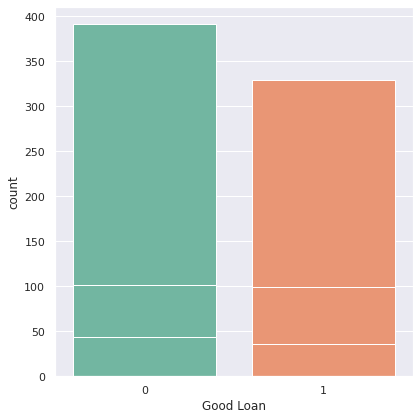

In [60]:
# Checking for the Distribution of the ys to see if we don't have any unbalanced data
ys = [y_train, y_test, y_valid]

for y in ys:
  plt.rcParams["figure.autolayout"] = True
  seaborn_plot = sns.countplot(x = y, palette = "Set2")
  for p in seaborn_plot.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)



#### **Step 6** : Building the ML Model

The Comparaison between the Linear Regression and the Logistic Regression Model.
For our case, we will be deploying a Logistic Regression Model.

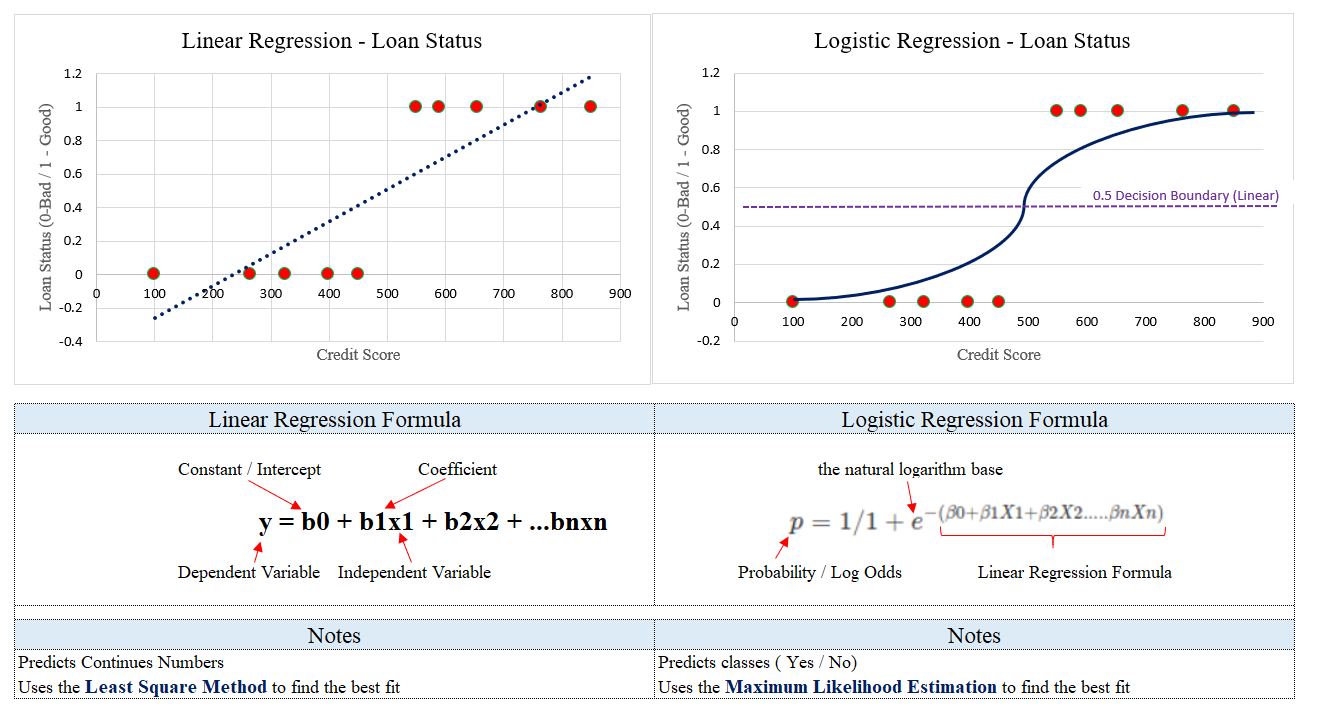

Some Details:

- We fit an "S" Shape logistic Function
- The curve tells you the porbability if a loan is good or bad
- If we have a high Credit score, there is a high probability that it's a good loan

In [61]:
# Creating the ML Model and training it
log_reg = LogisticRegression(random_state = 15, solver = 'lbfgs')

# Training the model on the Data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=15)

In [76]:
# Predicting the Data
y_pred = log_reg.predict(X_train)

# Displaying the Predicting Vector
display(type(y_pred), y_pred, y_pred.shape)

numpy.ndarray

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,

(720,)

In [75]:
# Predicting the Density of Probability
prob_y_pred = log_reg.predict_proba(X_train)

# Displaying the Matrix of Probabilities Predictions
display(type(prob_y_pred), prob_y_pred, prob_y_pred.shape)

numpy.ndarray

array([[0.62607402, 0.37392598],
       [0.87076182, 0.12923818],
       [0.08629877, 0.91370123],
       ...,
       [0.16621582, 0.83378418],
       [0.22931747, 0.77068253],
       [0.22204398, 0.77795602]])

(720, 2)

In [78]:
# Predict logarithm of probability estimates
log_prob_y_pred = log_reg.predict_log_proba(X_train)

# Displaying the Matrix of Probabilities Predictions
display(type(log_prob_y_pred), log_prob_y_pred, log_prob_y_pred.shape)

numpy.ndarray

array([[-0.46828667, -0.98369742],
       [-0.1383868 , -2.0460982 ],
       [-2.44993999, -0.09025164],
       ...,
       [-1.7944682 , -0.18178069],
       [-1.4726479 , -0.26047875],
       [-1.50487979, -0.25108529]])

(720, 2)

In [82]:
# Coefficients of the feature
log_reg.coef_

array([[-1.46622764,  1.16025256,  0.97053806, -1.10599056,  0.21802189,
         0.15514386,  0.56151322, -0.52346499, -0.07948359,  0.12391951,
        -0.2189164 , -0.15293422,  0.17929   , -0.10062944, -0.13101603,
         0.47702074, -0.37478387,  0.0785181 ,  0.08321841, -0.03457264,
        -0.03873716, -0.21901401, -0.38167303, -0.38504044,  0.44403762,
         0.08472715,  0.675408  , -0.14525487,  0.72067689,  0.05489069,
         0.14075955,  0.1214819 , -0.33511274,  0.28811388, -0.19254796,
        -0.08853446,  0.02106252, -0.3802238 ,  0.50777139, -0.96797744,
        -0.13033765]])

In [68]:
# Inspecting the shape of the Data
log_reg.predict(X_train).shape

(720,)

#### Step 7 : Evaluating the Model

In [86]:
# Scoring the Training Data
print("The Training Accuracy : ", log_reg.score(X_train, y_train))

# Scoring the Testing Data
print("The Testing Accuracy : ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy :  0.7583333333333333
The Testing Accuracy :  0.805
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       391
           1       0.74      0.73      0.73       329

    accuracy                           0.76       720
   macro avg       0.76      0.76      0.76       720
weighted avg       0.76      0.76      0.76       720



**Defining the Confusion Matrix Function**

In [93]:
def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
  if classes is not None:
    sns.heatmap(cm, cmap = 'BuPu', xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
    sns.heatmap(cm, vmin = 0, vmax = 1)
  plt.title(title)
  plt.ylabel('True Labels')
  plt.xlabel("Predicted Labels")

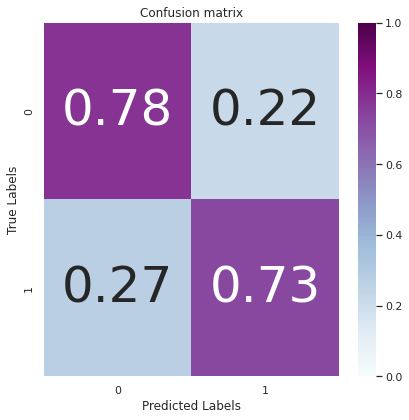

In [94]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [95]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.7826087  0.72948328]
The Precision is: [0.77468354 0.73846154]
The False positive rate is: [0.27051672 0.2173913 ]
The False Negative Rate is:  [0.2173913  0.27051672]

The average TPR is: 0.756045989163473
The average Precision is: 0.756572541382668
The average False positive rate is: 0.243954010836527
The average False Negative Rate is: 0.243954010836527


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


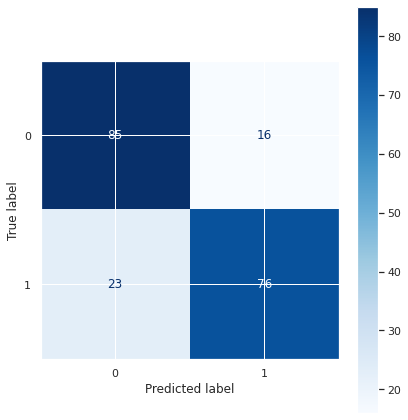

In [99]:
from sklearn.metrics import plot_confusion_matrix

cm_plotting = plot_confusion_matrix(log_reg, X_test, y_test, cmap = 'Blues', values_format = '.3g')

In [100]:
cm_plotting.confusion_matrix

array([[85, 16],
       [23, 76]])